<a href="https://colab.research.google.com/github/marionboynton/Product-Recommender/blob/main/TeamA_ZindiChallengeReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Zindi "Zimnat Insurance Recommendation Challenge" Report for DSI Team A

In this challenge, the goal was to produce an ML model that the insurance company Zimnat can use to predict which kinds of insurance products to recommend to customers. 


# Project Workflow

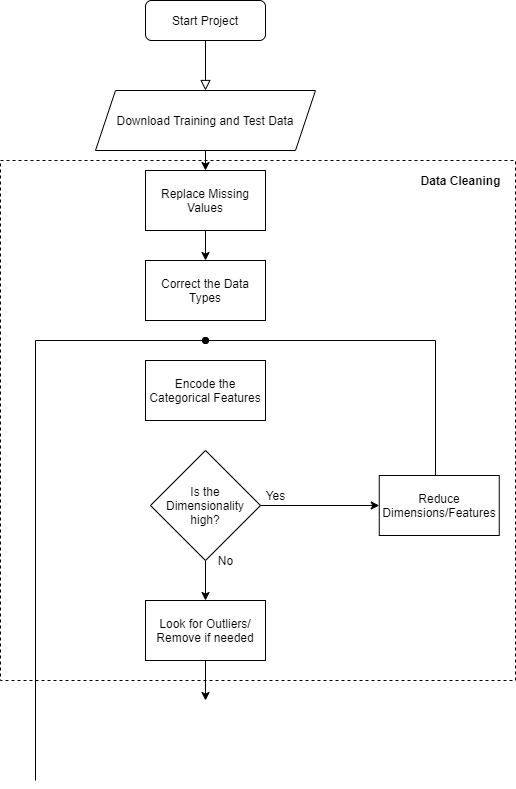

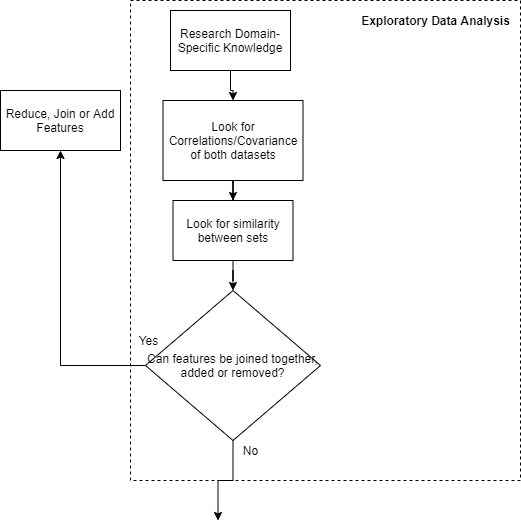

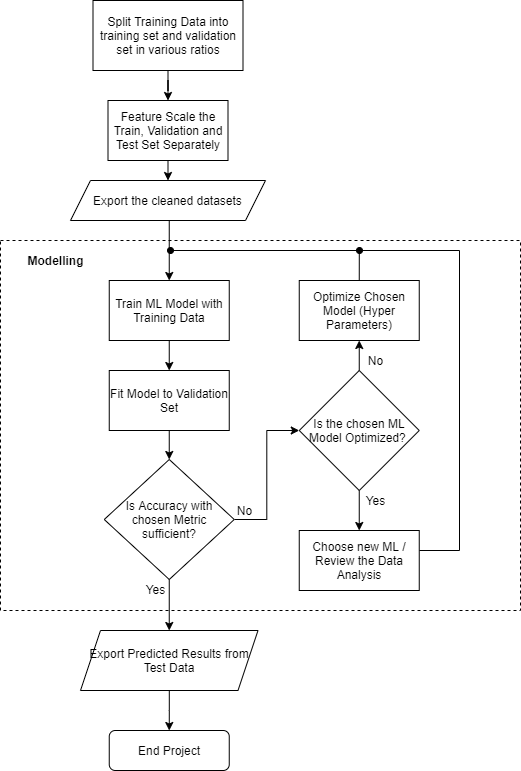

# Importing Libraries

In [ ]:
# import numpy and pandas packages, 
# both necessay for the exercise
import pandas as pd
import numpy as np

# google colaboratory is used for this work 
# and mounted in the google drive repository
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Setting up paths to the training and test datasets and reading into pandas dataframes

In [ ]:
# paths to the training and test data
train_path = '/content/gdrive/My Drive/Train.csv'
test_path = '/content/gdrive/My Drive/Test.csv'
# read the taining and test data into pandas 
# dataframes
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

#Exploratory Data Analysis (EDA)

In [ ]:
# A quick EDA reveals that the training
# data has 29132 rows and 29 columns
train_data

In [ ]:
print(train_data.ID.nunique())

NameError: ignored

All 29132 rows in the test data have unique customer IDs, as stated in the "Data" description on the challenge dashboard

In [ ]:
# A quick EDA reveals that the test
# data has 10000 rows and 29 columns
test_data

In [ ]:
print(test_data.ID.nunique())


All 10000 rows in the test data have unique customer IDs, as stated in the "Data" description on the challenge dashboard

In [ ]:
#check for missing values:
train_data.isnull().values.any()

In [ ]:
test_data.isnull().values.any()

The two checks above reveal that both training and test data have missing values.

In [ ]:
# Get names of columns with missing values in training
# data
train_cols_missing = [col for col in train_data.columns
                     if train_data[col].isnull().any()]
train_cols_missing

In [ ]:
# Get names of columns with missing values in test
# data
test_cols_missing = [col for col in test_data.columns
                     if test_data[col].isnull().any()]
test_cols_missing

In both training and test data, "join_date" is the column with missing values.

In [ ]:
train_data.join_date.isnull().sum()

In [ ]:
test_data.join_date.isnull().sum()

The two checks above show that the "join_date" in the training data has two missing values, 
whereas the same column in the test data has one missing value. Also, the missing values are in rows 15964 and 21729 for the training data; and row 9056 in the test data, as shown in the next two code cells below.

In [ ]:
train_data.join_date[train_data.join_date.isnull()]

In [ ]:
test_data.join_date[test_data.join_date.isnull()]

To train a model that deploys reasonably well, the training data has to be similar to the test data. The logical comparison in the next code cell checks for column similarities between the training and test data.

In [ ]:
train_data.columns == test_data.columns

The returned "True" booleans indicate that columns of the training data are the same as those of the test data.

## Exploratory Data Analysis Function

### Importing graphing libraries

Seaborn: This library is imported to display the correlation matrix of the test and train data. Also, to produce appealing visualisations.

In [ ]:
#Importing the graphing libraries
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Defining the graphing function used

A function was created to enable a quick way to produce graphs between the features and products. 

This function produces five graphs.


1.   Bar Chart: To compare a selected feature to a purchased product.
2.   Histogram: To show the continuous distributions of some of the features.
3.   Count Graph: Display the value counts of each category in a feature.
4.   Heat Map: Create a correlation matrix with a heat map denoting how strong the correlation between two features.
5.   A pair plot: To view the various distributions between an array of features.

The figure size is standardised to create comparable graphs.







In [ ]:
#Defining graphing function
def ExploreGraphs(x_feature, y_result, df, choice, custom):
  
  #Setting the visual features of the graph
  sns.set_style("darkgrid")
  plt.figure(figsize=(10,10))
  
  #Bar Chart choice
  if choice == "bar":

    barplot = sns.barplot(x = x_feature, y = y_result, data = df, ci=custom)
    plt.show()

  #Histogram choice
  elif choice == "hist":

    histplot = plt.hist(x = df[x_feature])
    plt.show()

  #Count Plot Choice
  elif choice == "count":

    barplot = sns.countplot(x = x_feature, data = df)
    plt.show()

  #Heat map choice
  elif choice == "heat":

    plt.figure(figsize=(30,30))
    sns.heatmap(df.corr(), vmax=0.8, square=True, annot = True)

  #Pair plot choice
  elif choice == "pair":

    sns.pairplot(df)

  #In case the choice input is not defined in the function
  else:
    print("Not a valid choice")

### Graphing Area

The instructions are written in code cell to be clear. The user has the option to select between different types of graphs.

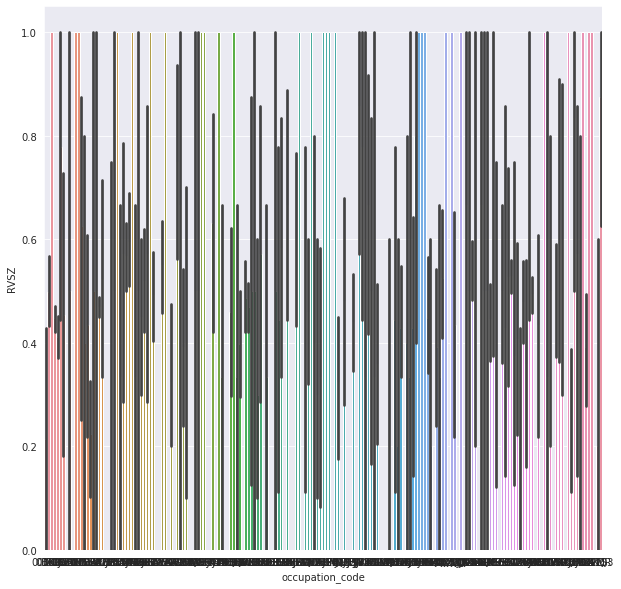

In [ ]:
'''
How to use function
FIRST PARAMETER: X Feature (Pandas Column Name)

SECOND PARAMETER: Y FEATURE (Pandas Column Name)

THIRD PARAMETER: DATA (Pandas Dataframe)

FOURTH PARAMETER: Choice of graph: "bar" for Bar Plot (Good for comparing one insurance product with a feature),
                                    "hist" for Histogram (Good for continuous distrbution of one feature),
                                    "count" for a count plot (Good for the discontinuous distribution of one feature),
                                    "heat" for a heatmap between the variables of the dataset,
                                    "pair" for a pairplot between the variables of a dataset (Be careful of the number of features you're comparing)

FIFTH PARAMETER: Confidence Interval error bar for Bar Plot = number (number% Confidence Interval), None (No error bar) 
'''
ExploreGraphs("occupation_code", "RVSZ", test_data, "bar", 95)

## Graphs

This correlation matrix shows the different correlations between the products in the training data. Certain product pair such as AHXO and N2MW have high positive correlations, meaning that a customer is likely to have purchased both products. 

RVSZ and K6QO are the most popular product pair. Meaning they have a negative correlations with most are other products with a significatn adoption. 

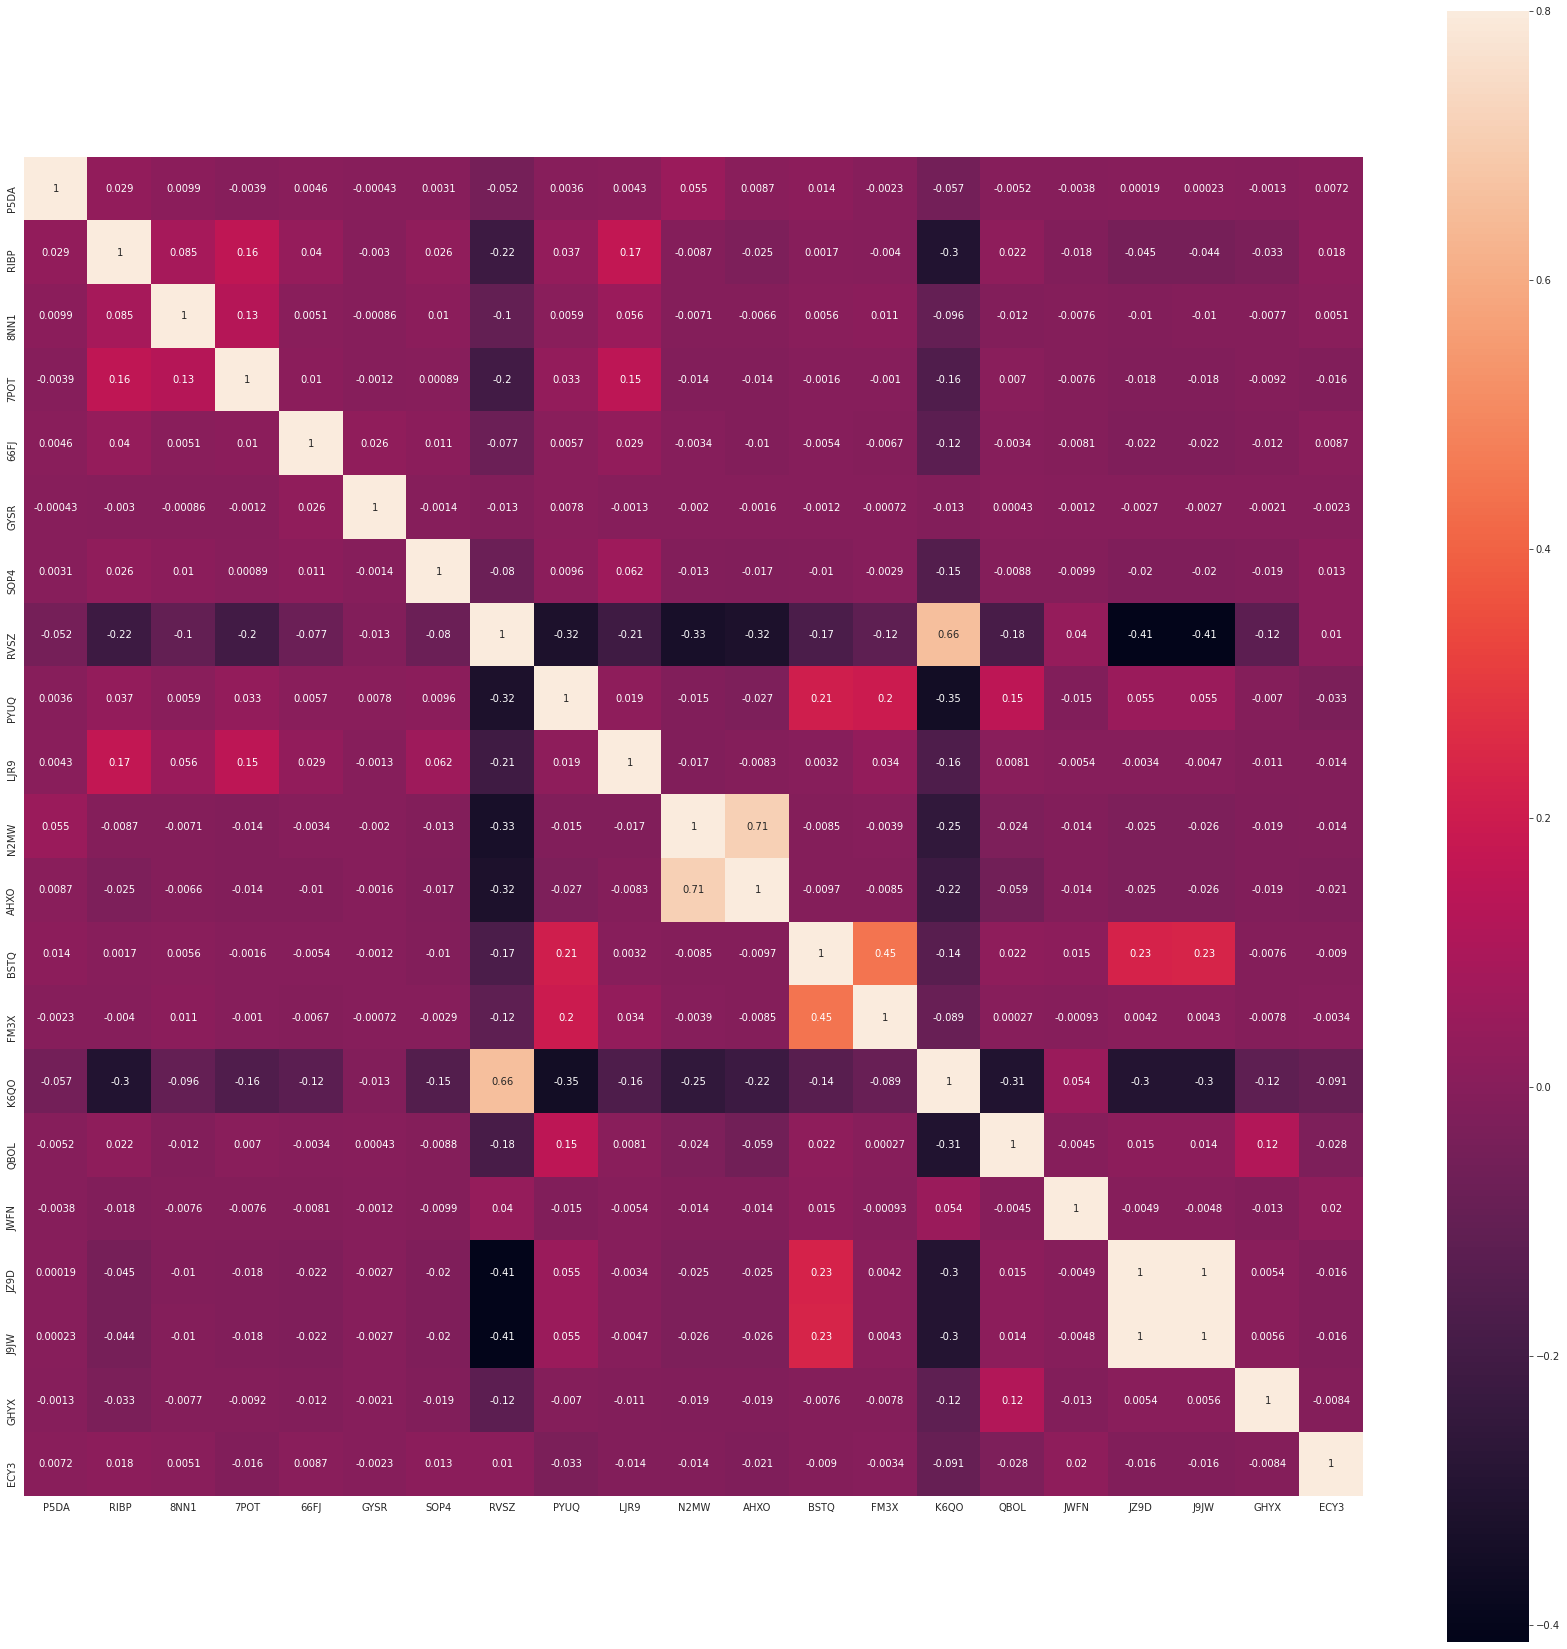

This graph is an extension of the previous graph, but highlights some of the correlations with the features. Especiall with join year, it shows when some products were adopted.

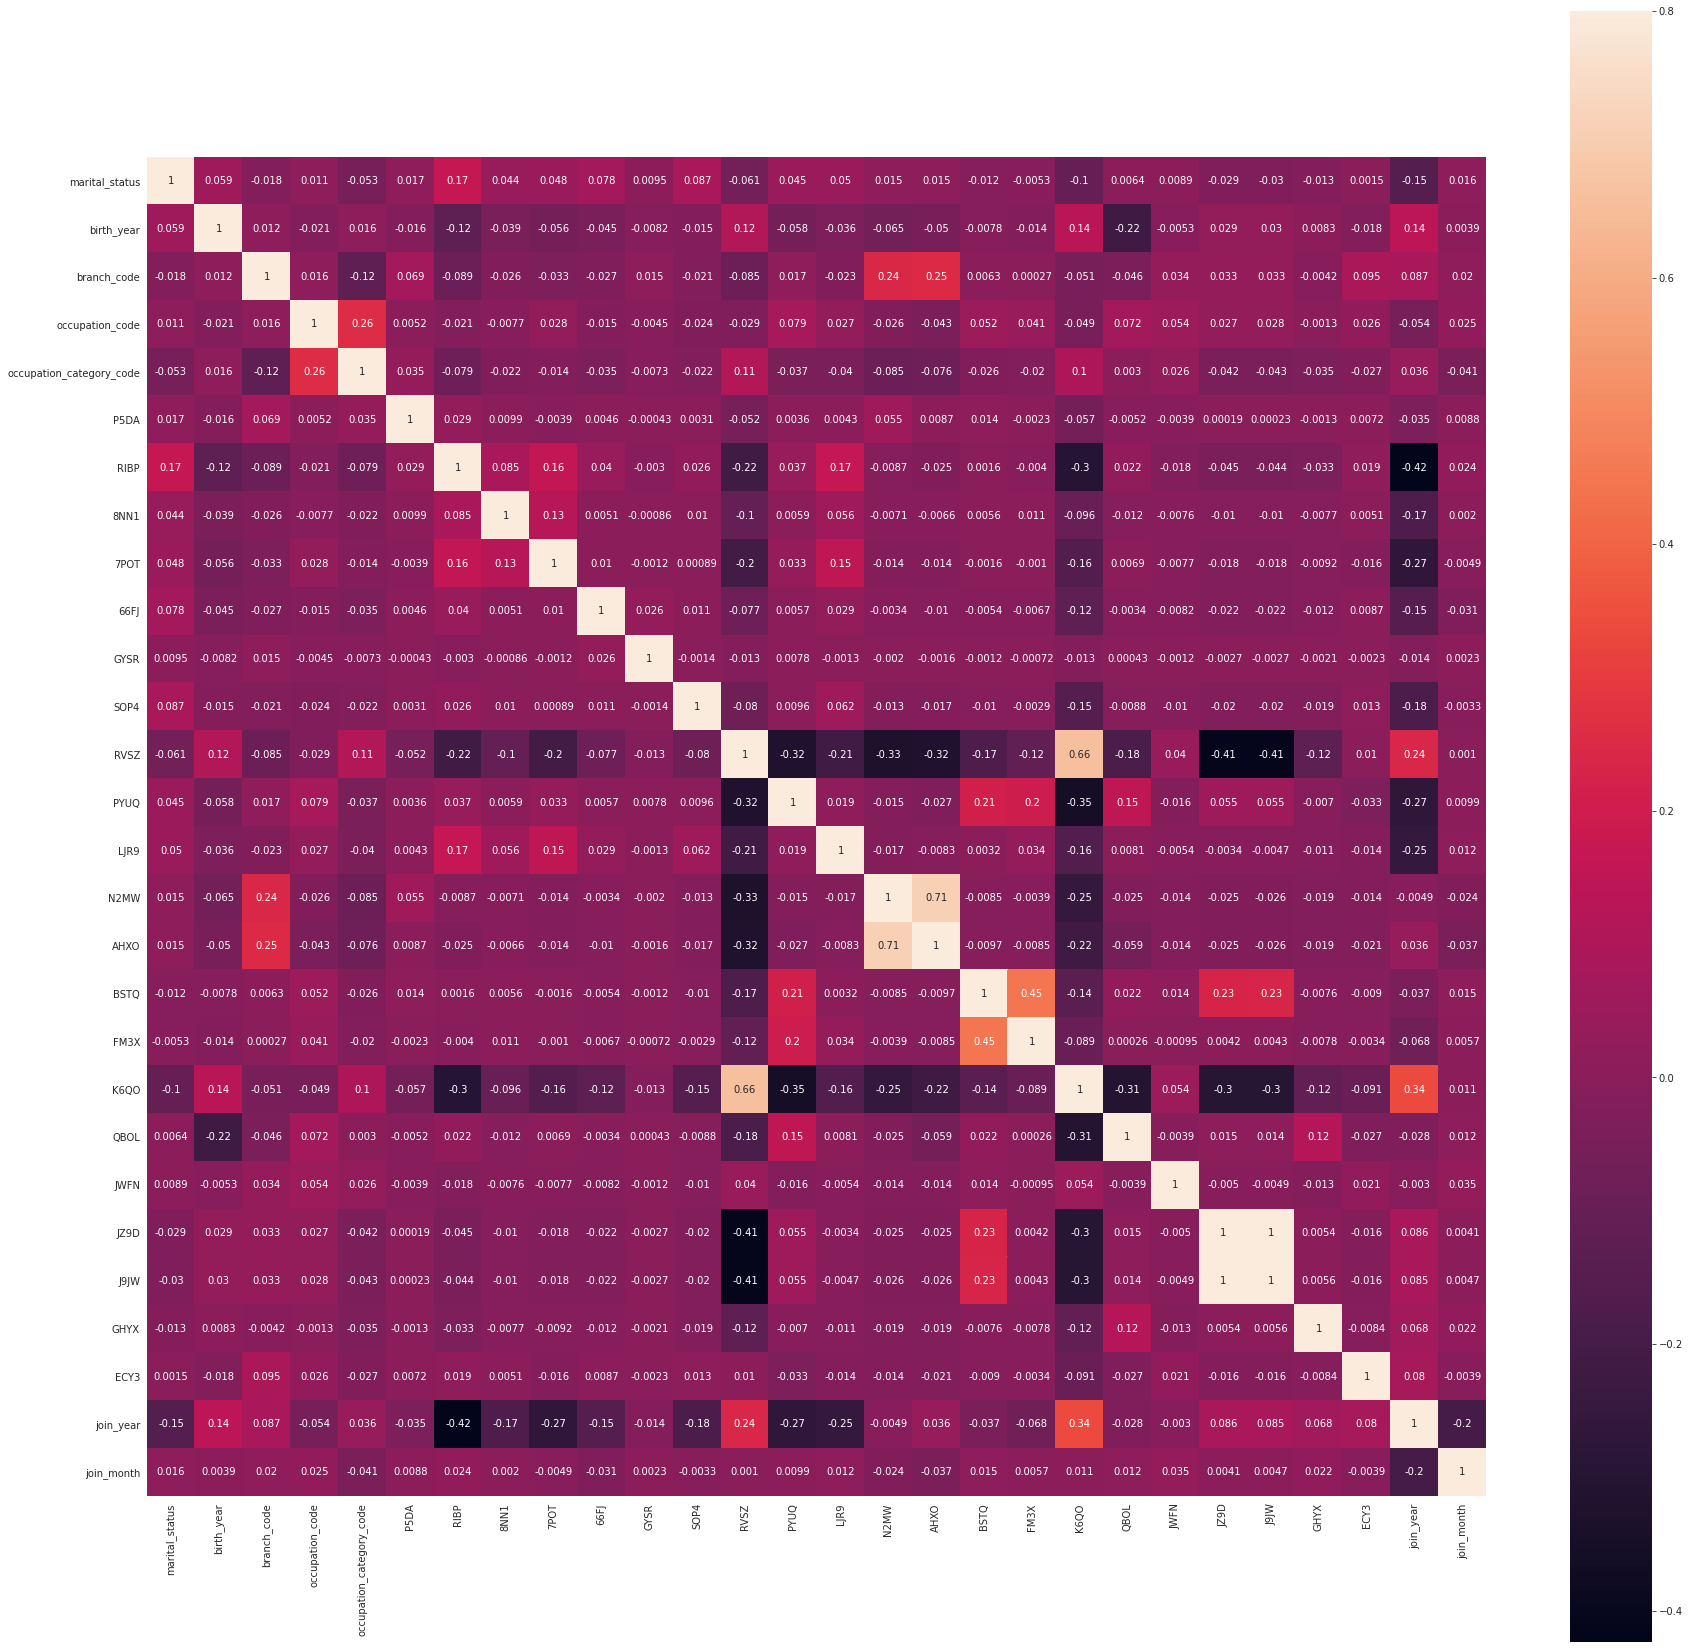

This a sample count graph from the train data. It highlights the most popular categories in the occupation category code feature.

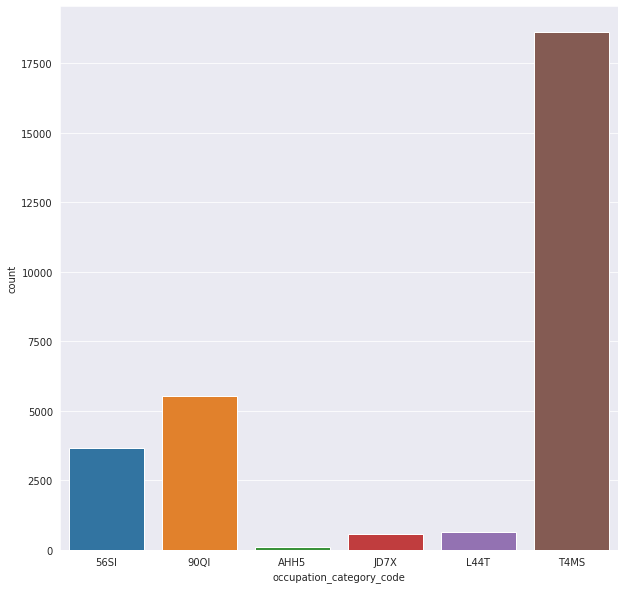

[This spreadsheet shows the similarities between the distributions between the training and test datasets.](https://docs.google.com/spreadsheets/d/1swW0wdD7kSzo30Zzas-ES7ya6H8byIv9H4crAz3l9z8/edit?usp=sharing)

Because of the observed similarites between the training and test data, it is assumed that the validation score would be similar to the test score.

#Random Forest (RF) ML algorithm

"Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks" (ref. https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/).

#Data preparation for RF model

In [ ]:
#Clean Training Data

dtr = train_data 
#As the customer ID is unique and thus plays no
#role in the modelling, its column is removed
dtr = dtr.drop('ID', axis=1)
#The sex is converted to numerical values as an ML
#would return an error if this is not done 
dtr.sex = dtr.sex.replace(['M', 'F'], [1, 0])
#We remove the two rows containing null join dates as 
#this is a less than 1% removal from the total dataset
dtr = dtr.dropna()
#The marital status is converted to numericals for the
#same reason given for the sex
dtr.marital_status = dtr.marital_status.replace(['M', 'U', 'S', 'W', 'D', 'P', 
                                                 'R','f', 'F'], [1,2,3,4,5,6,7,
                                                                 8,8])
dtr.join_date = pd.to_datetime(dtr.join_date, dayfirst=True)
dtr['join_year'] = dtr.join_date.dt.year.astype(int)
dtr['join_month'] = dtr.join_date.dt.month.astype(int)
dtr['join_age'] = dtr.join_year - dtr.birth_year


In [ ]:
#branch code to numeric

tr_branchcode = dtr.branch_code.unique().tolist()
te_branchcode = test_data.branch_code.unique().tolist()
dict_branchcode = dict(zip(tr_branchcode, list(range(1, 16))))
dict_no = 15
for i in range(len(te_branchcode)): 
  if te_branchcode[i] not in dict_branchcode:
    dict_branchcode[te_branchcode[i]] = dict_no + 1
    dict_no = dict_no + 1

#still 15 values therefore no new codes in test data

dtr.branch_code = dtr.branch_code.map(dict_branchcode)

In [ ]:
#occupation code to numeric

tr_occucode = dtr.occupation_code.unique().tolist()
te_occucode = test_data.occupation_code.unique().tolist()
dict_occucode = dict(zip(tr_occucode, list(range(1, 234))))
dict_no = 233
for i in range(len(te_occucode)): 
  if te_occucode[i] not in dict_occucode:
    dict_occucode[te_occucode[i]] = dict_no + 1
    dict_no = dict_no + 1

#242 values therefore 9 more codes seen in test data

dtr.occupation_code = dtr.occupation_code.map(dict_occucode)

In [ ]:
#occupation category code to numeric
# 6 codes, no new codes in test data
dict_ocatcode = dict(zip(['T4MS', '90QI', '56SI', 'JD7X', 'L44T', 'AHH5'], [1,2,3,4,5,6]))
dtr.occupation_category_code = dtr.occupation_category_code.map(dict_ocatcode)

In [ ]:
dtr.head()

,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,join_year,join_month,join_age
0,2019-02-01,0,1,1987,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2019,2,32
1,2019-06-01,0,1,1981,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2019,6,38
2,2013-06-01,1,2,1991,3,2,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2013,6,22
3,2019-08-01,1,1,1990,1,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2019,8,29
4,2019-08-01,1,1,1990,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2019,8,29


In [ ]:
#Clean Test Data 

dte = test_data
dte = dte.drop('ID', axis=1)
dte = dte.dropna()
dte.sex = dte.sex.replace(['M', 'F'], [1, 0])
dte.marital_status = dte.marital_status.replace(['M', 'U', 'S', 'W', 'D', 'P', 
                                                 'R','f', 'F'], [1, 2, 3, 4, 5,
                                                                 6,7,8,8])
dte.branch_code = dte.branch_code.map(dict_branchcode)
dte.occupation_code = dte.occupation_code.map(dict_occucode)
dte.occupation_category_code = dte.occupation_category_code.map(dict_ocatcode)
dte.join_date = pd.to_datetime(dte.join_date, dayfirst=True, errors='coerce')
dte['join_year'] = dte.join_date.dt.year #.astype(int)
dte['join_month'] = dte.join_date.dt.month #.astype(int)
dte['join_age'] = dte.join_year - dte.birth_year

#### NA values in test data 

In [ ]:
y = dtr.iloc[:,7:-3]

In [ ]:
zimnat_features = ['join_year', 'join_month', 'sex', 'marital_status',
'birth_year', 'branch_code', 'occupation_code', 'occupation_category_code', 'join_age']

In [ ]:
X = dtr[zimnat_features]

In [ ]:
#randomForest_reg
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# split data into training and validation data, for both features and target
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, 
                                                  test_size=0.2, random_state=0)

# Define model. Specify a number for random_state to ensure same results each run
rforest_reg = RandomForestRegressor(max_depth=2, random_state=1)

#Fit linear regression model
rforest_reg.fit(X_train,y_train)

#Make a prediction on validation data
val_predictions = rforest_reg.predict(X_val)
#val_probabilities = softmax(val_predictions, axis=1)

print(mean_absolute_error(y_val, val_predictions))
#print(mean_absolute_error(y_val, val_probabilities))

0.07357831134440375


In [ ]:
X_test = dte[zimnat_features]

In [ ]:
test_predictions = rforest_reg.predict(X_test)

In [ ]:
#predict test 
#SUBMISSION
predmax = pd.DataFrame(test_predictions)

In [ ]:
df_pred = pd.DataFrame(predmax)
vect_pred = [round(item,3) for i,row in df_pred.iterrows() for item in row]
vect_pred

In [ ]:
# Format and create the submission file out of the predicted probabilites 

def submit_format(test_data, pred_vect):
  """This function formats the predicted probabilities to create 
the submission file to the Zindi scoreboard"""
  
  # The first row
  submit_dict = {'ID X PCODE': 'Label'}
  i = 0

  # iterate for each ID over each product
  for id in test_data.ID:
    for product in test_data.columns[9:]:
      submit_dict['{} X {}'.format(id, product)] = pred_vect[i]
      i += 1

  submit = pd.Series(submit_dict)
  submit_file = submit.to_csv('/content/gdrive/My Drive/submission.csv', header=False) 


In [ ]:
submit_format(test_data, vect_pred)

The above approach resulted resulted in the following scores on the Zindi leader board:

Y9LDrXfY  
6 days ago
submission_rf4.csv
rf_regressor
0.118170230874063

hJZA5uC1
6 days ago
submission_rf3.csv
rf_regressor
0.118611482656334

FR1RC23U
7 days ago
submission_rf2.csv
rf_regressor
0.117431076289676

In an effort to improve these scores, one-hot encoding was implemented for "marital_status", "branch_code" and "occupation_category_code". Expectations were that this would improve the score but it did not, as show by the following Zindi score:

F6KkoHQs
1 day ago
submission_rf5.csv
rf_regressor
0.255501372202152

Below is the one-hot-encoding that gave rise to the said score:


In [ ]:
from sklearn.model_selection import train_test_split
# split data into training and validation data, for both features and target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, 
                                                  test_size=0.3, random_state=0)
# Get list of categorical variables in training data
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)


In [ ]:
#randomForest_reg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)
  

Even though the above one-hot-encoding gave a good MAE compared to the label encoding in the previous appraoch, it did not deploy well on the Zimnat test data.

# Second Cleaning Method

## Introduction

After the limited success of the initial project workflow, the data cleaning process was reworked to see if any accurary improvements could be gained. In this process, one-hot encoding would be implemented, alongside the categorisation of both the Birth Year and Join Date.

## Importing the Libraries

Three libraries would be necessary for the cleaning process. 

*   Pandas: To handle the missing data and changing data type issues.
*   NumPy: To feature scale the data correctly and handle the output of the One Hot-Encoding
*   MatPlotLib.PyPlot: To visualise the outputs of the cleaned data






In [ ]:
#Importing libraries for cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Importing Training and Test Data

The training and testing data from the Zindi Challenge is imported to clean both sets consistently. This is done using Pandas as it is a robust and simple package to handle datasets.

In [ ]:
#Using Pandas Library to import training data
train_data = pd.read_csv("drive/My Drive/Train.csv")

#Using Pandas Library to import test data
test_data = pd.read_csv("drive/My Drive/Test.csv")

## Missing Values Code

This section looks for the missing data in both sets and corrects those missing values.

The first few rows are checked to get a sense of the features.

In [ ]:
train_data.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


Defining two functions used to handle missing data more efficiently.

1.   NACount(dataframe): Create a count of missing values of each feature to see which features have missing data.
2.   UniqueCount(dataframe): Produce a set of the unique values of each values to find unexpected values from any set of data.



In [ ]:
#Check Missing Values in a Dataset
def NACount(data):
  NaCount = {}
  for feature in data.columns:
    NaCount[feature] = data[feature].isna().sum()

  return NaCount

In [ ]:
#Check Unique Values in Training Data
def UniqueCount(data):
  UnCount = {}
  for feature in data.columns:
    UnCount[feature] = data[feature].unique()

  return UnCount

With the defined functions, the missing values from each function are printed out. It can be seen that training data has to missing values in the join date feature. While the test data has one missing value in the same feature.

In [ ]:
#Run Function on training Data

print(NACount(train_data))

{'ID': 0, 'join_date': 2, 'sex': 0, 'marital_status': 0, 'birth_year': 0, 'branch_code': 0, 'occupation_code': 0, 'occupation_category_code': 0, 'P5DA': 0, 'RIBP': 0, '8NN1': 0, '7POT': 0, '66FJ': 0, 'GYSR': 0, 'SOP4': 0, 'RVSZ': 0, 'PYUQ': 0, 'LJR9': 0, 'N2MW': 0, 'AHXO': 0, 'BSTQ': 0, 'FM3X': 0, 'K6QO': 0, 'QBOL': 0, 'JWFN': 0, 'JZ9D': 0, 'J9JW': 0, 'GHYX': 0, 'ECY3': 0}


In [ ]:
#Run Function on test Data

print(NACount(test_data))

{'ID': 0, 'join_date': 1, 'sex': 0, 'marital_status': 0, 'birth_year': 0, 'branch_code': 0, 'occupation_code': 0, 'occupation_category_code': 0, 'P5DA': 0, 'RIBP': 0, '8NN1': 0, '7POT': 0, '66FJ': 0, 'GYSR': 0, 'SOP4': 0, 'RVSZ': 0, 'PYUQ': 0, 'LJR9': 0, 'N2MW': 0, 'AHXO': 0, 'BSTQ': 0, 'FM3X': 0, 'K6QO': 0, 'QBOL': 0, 'JWFN': 0, 'JZ9D': 0, 'J9JW': 0, 'GHYX': 0, 'ECY3': 0}


The unique values of each feature are printed to observe any unexpected values from the features. Other than the uncorrected 'nan' values from the join date, the marital status in the training data has an 'f' instead of a conventional 'F'. 

This would need to be fixed to avoid confusing the 'f' as additional category value.

In [ ]:
#Run Unique Values Function on test Data

print(UniqueCount(test_data))

In [ ]:
#Run  Unique Values Function on training Data

print(UniqueCount(train_data))

To handle the two missing values from the training data, a decision was taken to remove the rows. This was because the training data contained 30,000 records, so the drop would only result in a 0.007% loss in data, and no systematic pattern was uncovered. This should limit the concern of sampling bias.

In [ ]:
#Drop the two records with missing join dates
train_data.dropna(inplace = True)
print(NACount(train_data))

{'ID': 0, 'join_date': 0, 'sex': 0, 'marital_status': 0, 'birth_year': 0, 'branch_code': 0, 'occupation_code': 0, 'occupation_category_code': 0, 'P5DA': 0, 'RIBP': 0, '8NN1': 0, '7POT': 0, '66FJ': 0, 'GYSR': 0, 'SOP4': 0, 'RVSZ': 0, 'PYUQ': 0, 'LJR9': 0, 'N2MW': 0, 'AHXO': 0, 'BSTQ': 0, 'FM3X': 0, 'K6QO': 0, 'QBOL': 0, 'JWFN': 0, 'JZ9D': 0, 'J9JW': 0, 'GHYX': 0, 'ECY3': 0}


Since the full test data would be needed for submission on the Zindi website. A simple imputation was made for a join date in the most common bin of both sets of data, found in later analysis. 

In [ ]:
#Fill the one record with a missing join date from the Test Data with a date in the most common bin
test_data.fillna('2019-01-01', inplace=True)
print(NACount(train_data))
print(NACount(test_data))

{'ID': 0, 'join_date': 0, 'sex': 0, 'marital_status': 0, 'birth_year': 0, 'branch_code': 0, 'occupation_code': 0, 'occupation_category_code': 0, 'P5DA': 0, 'RIBP': 0, '8NN1': 0, '7POT': 0, '66FJ': 0, 'GYSR': 0, 'SOP4': 0, 'RVSZ': 0, 'PYUQ': 0, 'LJR9': 0, 'N2MW': 0, 'AHXO': 0, 'BSTQ': 0, 'FM3X': 0, 'K6QO': 0, 'QBOL': 0, 'JWFN': 0, 'JZ9D': 0, 'J9JW': 0, 'GHYX': 0, 'ECY3': 0}


The 'f' identified earlier is replaced with the conventional 'F' found in the test data. A .replace() method is used on the marital status feature.

In [ ]:
#Replacing little f with big F
train_data.marital_status.replace(["f"], ["F"], inplace = True)

With this approach, the missing data had been removed and any unexpected values had been dealt with. 

## Data Type Checking

In this section, the data types of each features would be checked and changed if necessary to their appropriate type. This is to improve handling the data in later sections of the analysis and cleaning process.

Defining a function to change the data types to their appropraite types

*   catDataType(dataframe): Change any feature that is an object but not the ID column into the categorical data type. Returns the dataframe.

This is because this data type is more memory efficient as compared to objects. It also has avalible methods such as value_counts(), to quickly see the most common values in the feature. Making analysis quicker and clearer. 

The ID column would not be used in training the model so its data type is of no concern.



In [ ]:
def catDataType(data):
  for feature in data.columns:
    if data[feature].dtype == "object" and feature != "ID":
      data[feature] = data[feature].astype('category')

  return data

The data types of both sets of data are checked to see what needs to be changed. The product features don't need to be changed since they are binary values in training to test set, so int64 would be okay. So focus would be on the explainatory features. 

In [ ]:
#Check the data types of the training data
train_data.dtypes

In [ ]:
#Check the data types of the test data
test_data.dtypes

What diffentiated this cleaining method from the previous one was the incorporation of categorisation in the birth year and join date. It was hypothesised that with less categories, a model less prone to overfitting may emerge, resulting in a good accuracy score on the private leaderboard. 

For the birth year feature the Pandas Cut method was used as the converting tool. This method allowed the admission of custom bin boundaries, allowing for teaking if needed. 

For binning to work, the training and test set would need the same boundaries. So that the model can fit to the test data.

Ten year increments were used as the initial bin boundaries, as each decade was hypothesised to have differences. The last bin is 20 years to capture the outlier data in the training set. 

In [ ]:
#Create categorical feature from birth year
cut_bins = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2020]
train_data['birth_year'] = pd.cut(train_data['birth_year'], bins=cut_bins)
test_data['birth_year'] = pd.cut(test_data['birth_year'], bins=cut_bins)

Before binning the join date feature, it was converted into datetime to manipulate it without any issues.

In [ ]:
#Convert the join date to datetime
train_data['join_date'] = pd.to_datetime(train_data['join_date'])
test_data['join_date'] = pd.to_datetime(test_data['join_date'])
train_data.dtypes

Due to the specific nature of the datetime data type, setting custom bin boundaries created issues. In this case, eight bins were set as an initial value for further customisation. The generated bins are then imported as a parameter in the test data cut function, to ensure the boundaries for both sets remain the same.

In [ ]:
train_data['join_date'], bins_jd = pd.cut(train_data['join_date'], bins=8, retbins=True)
test_data['join_date'] = pd.cut(test_data['join_date'], bins = bins_jd)

In [ ]:
train_data.join_date.value_counts()

(2018-10-08 03:00:00, 2020-01-08]             12062
(2017-07-08 06:00:00, 2018-10-08 03:00:00]     7352
(2016-04-07 09:00:00, 2017-07-08 06:00:00]     4415
(2015-01-06 12:00:00, 2016-04-07 09:00:00]     2570
(2013-10-06 15:00:00, 2015-01-06 12:00:00]     1198
(2012-07-06 18:00:00, 2013-10-06 15:00:00]      615
(2011-04-06 21:00:00, 2012-07-06 18:00:00]      530
(2010-01-01 08:16:48, 2011-04-06 21:00:00]      388
Name: join_date, dtype: int64

In [ ]:
test_data.join_date.value_counts()

For the remaining 'object' data type features, the category function is applied to them.  

In [ ]:
#Convert the categorial features into the category data type
train_data = catDataType(train_data)
test_data = catDataType(test_data)
train_data.dtypes

In [ ]:
train_data.info()

The data types had changed to what was deemed appropriate.

## Feature Engineering

A copy of both sets of data was created to contain only the features of data set. To apply the encoding and scaling cleanly.

In [ ]:
#Creating a copy of the features
train_data_features = train_data.iloc[:,1:8]
test_data_features = test_data.iloc[:,1:8]


A copy of the products is created to ensure that it is not corrupted in the cleaning process.

In [ ]:
#Creating a copy of the products
train_data_products = train_data.iloc[:,8:]
test_data_products = test_data.iloc[:,8:]
test_data_products.head()

,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


As part of the hypothesis for this cleaning process, the occupation code was dropped as it had a positive correlation with the occupation category code feature. Also, applying one hot encoding to it would not be appropriate since that would create 200+ columns, reducing the accurracy of the model. 



In [ ]:
train_data_features.drop(columns = 'occupation_code', inplace = True)
test_data_features.drop(columns = 'occupation_code', inplace = True)
test_data_features

,join_date,sex,marital_status,birth_year,branch_code,occupation_category_code
0,"(2017-07-08 06:00:00, 2018-10-08 03:00:00]",M,M,"(1980, 1990]",94KC,90QI
1,"(2018-10-08 03:00:00, 2020-01-08]",M,M,"(1990, 2000]",1X1H,90QI
2,"(2018-10-08 03:00:00, 2020-01-08]",F,W,"(1960, 1970]",UAOD,T4MS
3,"(2018-10-08 03:00:00, 2020-01-08]",M,M,"(1980, 1990]",94KC,T4MS
4,"(2018-10-08 03:00:00, 2020-01-08]",F,M,"(1980, 1990]",UAOD,T4MS
...,...,...,...,...,...,...
9995,"(2018-10-08 03:00:00, 2020-01-08]",F,M,"(1980, 1990]",748L,T4MS
9996,"(2018-10-08 03:00:00, 2020-01-08]",M,M,"(1970, 1980]",UAOD,T4MS
9997,"(2017-07-08 06:00:00, 2018-10-08 03:00:00]",M,M,"(1990, 2000]",748L,56SI
9998,"(2013-10-06 15:00:00, 2015-01-06 12:00:00]",F,U,"(1980, 1990]",49BM,T4MS


The cleaned data is exported to a Google drive. For further encoding and scaling.

In [ ]:
pd.DataFrame(train_data_features).to_csv("drive/My Drive/train_data_features.csv")
pd.DataFrame(test_data_features).to_csv("drive/My Drive/test_data_features.csv")
pd.DataFrame(train_data_products).to_csv("drive/My Drive/train_data_products.csv")
pd.DataFrame(test_data_products).to_csv("drive/My Drive/test_data_products.csv")

## Conclusion

After the one hot encoding process, splitting and feature scaling of this particular approach. The basic Random Forrest model performed worse than the original cleaning process, the exact cause hadn't been identified yet, so the first process was used to produce the final model score.

Appendix: With the inclusion of the occupation code (label encoded) the model still didn't beat the original process, so more time would be needed to expore the join date and birth year customisation.

# Encoding the Categorial Data

In [ ]:
#Importing One Hot Encoding libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
train_data_features

In [ ]:

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0,1,2,3,5])], remainder='passthrough')
train_data_features = (ct.fit_transform(train_data_features))
test_data_features = (ct.fit_transform(test_data_features))

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_70 = sc.fit_transform(X_train_70)
X_valid_30 = sc.transform(X_valid_30)

In [ ]:
test_data_features = sc.fit_transform(test_data_features)

In [ ]:
train_data_features.shape

# Boosting Algorithms 

Ensemble learning is a process in which multiple models ('weak learners') are trained to produce a stronger final model ('strong learner'). Boosting is a type of ensemble learning where successive models are trained by trying to correct errors from previous models. 

Two boosting algorithms were considered for this problem - Extreme Gradient Boosting (XGBoost) and CatBoost. Both are implementations of gradient boosted decision trees. 

The CatBoost Model achieved higher scores on both the validation set and the test data. This is likely due to the CatBoost Model's effective way of handling categorical features. 


# CatBoost Model

Catboost is a decision tree model with gradient boosting. Cat is short for categorical as it automatically handles categorical features (numeric and strings); therefore minimal data preprocessing is required for data with categorical features. It can also automatically deal with missing values.

Catboost is a boosting algorithm. Boosting models train successive models by trying to correct errors from previous models. This is a sequential ensemble learning method - it combines multiple models trained sequentially to produce a stronger model. The final model (strong learner) is the weighted mean of all the models (weak learners). Another popular boosting model is XGBoost. 

CatBoost has both a classification and regression model. A Classifier model was implemented. SInce multi-label classification is not supported by CatBoost, a classifier was trained for each product to predict the product's probabilities. 



**Feature Preparation for CatBoost Model**

Minimal data preprocessing is required for catboost. Categorical features can be left as strings. Th enames of the categorical features are passed as a parameter when fitting the model. 

Several additonal features were created from the other features including the age of a person when joining the insurance company and the number of products the person has.

In [ ]:
#Feature Preparation for CatBoost Model 

#train data
dtr = traindata 
dtr.join_date = pd.to_datetime(dtr.join_date, dayfirst=True)
dtr['join_year'] = dtr.join_date.dt.year 
dtr = dtr.drop('join_date', axis=1)
dtr.marital_status = dtr.marital_status.replace(['f'], ['F'])

#test data
dte = testdata
dte.join_date = pd.to_datetime(dte.join_date, dayfirst=True)
dte['join_year'] = dte.join_date.dt.year
dte = dte.drop('join_date', axis=1)

#convert to age and years since joining
dtr[['age', 'years']] = dtr[['birth_year', 'join_year']].apply(lambda x: 2020-x, axis=1)
dte[['age', 'years']] = dte[['birth_year', 'join_year']].apply(lambda x: 2020-x, axis=1)

#additional feature: age when joined
dtr['age_join'] = (dtr['age'] - dtr['years']).astype(float)

#additional feature: number of products
dtr['num_products'] = traindata.apply(lambda row:  row[8:].sum(), axis = 1)
dte['num_products'] = testdata.apply(lambda row:  row[8:].sum() +1, axis = 1)

In [ ]:
#features for training
features = ['sex', 'marital_status', 'age', 'years', 'branch_code', 'occupation_code',
       'occupation_category_code','num_products']

#categorical features encoded by catboost model
cat_features = ['sex', 'marital_status','branch_code', 'occupation_code',
       'occupation_category_code']

products = ['P5DA', 'RIBP', '8NN1', '7POT', '66FJ',
       'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO', 'BSTQ', 'FM3X',
       'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3']

**Creating and Training Model**

A CatBoostClassifier model was created as the base model. The package, GroupKFold, was used to split the training dataset into different train and validation sets so the model could be fit several times using different splits of the data and an average of the scores and test set predictions could be produced. This was done to reduce bias and ensure the model was not overfit to a random sample of the training data. 

Some of the parameters for the model were chosen by studying parameter specifications and thinking about the problem as well as by transfer learning - inferring parameter values from other implementations of the CatBoostClassifer on similar problems.

A grid search on the parameter values to find the optimal values for the model was attempted; however this took too long to execute. 

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GroupKFold

best_params = {
    'depth': 4,
    'grow_policy': 'Depthwise',   #non-terminal leaves split by condition with best loss improvement
    'iterations': 10000,
    'learning_rate': 0.03,
    'objective': 'Logloss',
    'eval_metric': 'Logloss',
    'random_state': 216,
    'l2_leaf_reg': 6.0,   #coefficient at the L2 regularization term of the cost function
    'task_type': 'GPU',
    'thread_count': 1,
    "verbose": 500,  # 10 for each fold 
    "use_best_model": True,
}

model_cat = CatBoostClassifier(**best_params)

#create dataframe to add predictions to
df_predictions = dte[products].copy()

#to calculate mean score of different models
scoring = 0

#fit model for each product 
for product in products:
  print('-' * 30)
  print(product)

  i = 1
  group_kfold = GroupKFold(n_splits=5)
    
  #Split data into 5 folds and take mean of test predictions 
  for train_index, test_index in group_kfold.split(dtr[features], dtr[product],np.array(dtr['ID'])):
        print('Fold', i)

        #train and validation sets for fold
        X_tr, X_v = dtr.iloc[train_index], dtr.iloc[test_index]
        Y_tr, Y_v = dtr[product].iloc[train_index], dtr[product].iloc[test_index]
        
        #fit model on each fold
        model_cat.fit(
            X_tr[features],
            Y_tr,
            cat_features=cat_features,
            eval_set=[(X_v[features], Y_v)],
            early_stopping_rounds=600,
        )
        
        #add fold's log loss score
        scoring += model_cat.get_best_score()['validation']['Logloss']
        
        #predict test data
        fold_pred = np.array(
            list(
                map(lambda x: x[1],
                    model_cat.predict_proba(dte[features + products]))))
        
        #sum predictions from each fold
        if i == 1:
            predictions_product = fold_pred
        else:
            predictions_product += fold_pred
        i += 1
    
  #divide by n folds to get mean predictions for product
  predictions_product /= 5

  #Add product predictions to prediction dataframe
  df_predictions[product] = predictions_product

# take mean score of 21 products x 5 folds = 105
scoring /= 105 
print('MEAN SCORE =', scoring)

In [ ]:
#Calibrating predictions 

df_predicts = df_predictions.copy()

#if probability very small, convert prediction to 0 
def rep(x):
    if x<0.0001:
        x = 0
    return x

#if test data product is 1, convert prediction to 1
def ones(row):
  row_idx = row.name
  ones_row = dte.iloc[row_idx, 7:-2]
  new_row = [x if ones_row[i]!=1 else 1 for i, x in enumerate(row)]
  return pd.Series(new_row)

df_predicts_new = df_predicts.applymap(rep)
df_predicts0 = df_predicts_new.apply(ones, axis = 1 )

In [ ]:
#Add product names to columns
df_predicts0.columns = products
df_predicts0.head()

# Submission Format

A function was created to convert a dataframe of predictions to the required submission format. The function saves the resulting file in the user's goolgle drive with the name given as a parameter when the function is called. 

In [ ]:

def submit_format(test_data, pred_dataframe, name):
  #dataframe to vector
  vect_pred = [item for i,row in pred_dataframe.iterrows() for item in row]
  
  # The first row
  submit_dict = {'ID X PCODE': 'Label'}
  i = 0

  # iterate for each ID over each product
  for id in test_data.ID:
    for product in testdata.columns[8:-2]:
      submit_dict['{} X {}'.format(id, product)] = pred_vect[i]
      i += 1

  submit = pd.Series(submit_dict)
  submit_file = submit.to_csv(f'/content/gdrive/My Drive/{name}.csv', header=False) 

In [ ]:
#converting predictions from catboost model to submission format  
submit_format(testdata, df_predicts0, 'submission_cb')

# Conclusion

Several different models were considered and implemented for this challenge. Overall, the CatBoost model gave the best results. This is not surprising as it is well known to be a leading model when dealing with categorical data. However, it was difficult to tune the parameters and try different implementations of this model due to limited computational resources. 

The correlation graphs produced in the exploratory data analysis phase provided valuable tools to refine the number of features used in the models. Feature engineering additional features resulted in noticeable improvements in the models. 